# ANN - Classifier

In [33]:
import keras # library for neural network. Need tensorflow to installed before performing this installation.
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import normalize 
from sklearn.model_selection import train_test_split

In [34]:
# Reading data 
import pandas as pd

from google.colab import files
file = files.upload()
import io
data = pd.read_csv(io.BytesIO(file['Iris.csv']))

'''data = pd.read_csv("D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab11 - Neural Netwrok/Iris.csv")
data.head()'''

Saving Iris.csv to Iris.csv


'data = pd.read_csv("D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab11 - Neural Netwrok/Iris.csv")\ndata.head()'

In [35]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


**Visualisation of the dataset**

The coding below shows the visualisation of the dataset in order to understand the data more. It can be seen that every species of the Iris can be segregated into different regions to be predicted.

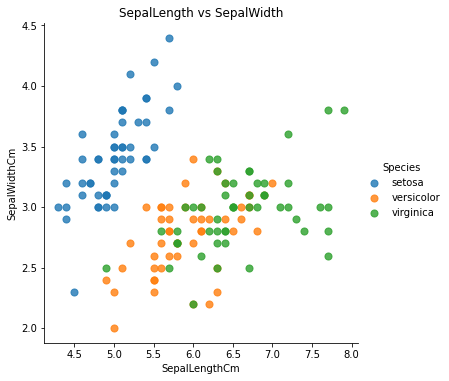

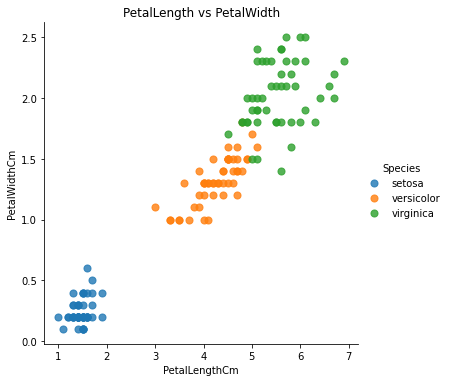

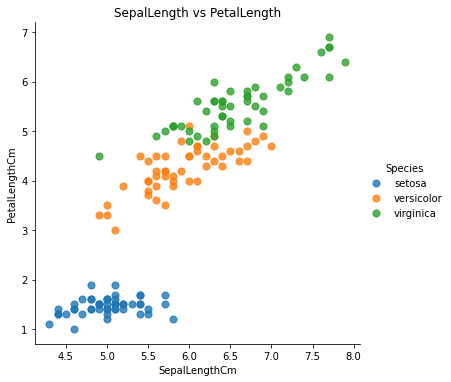

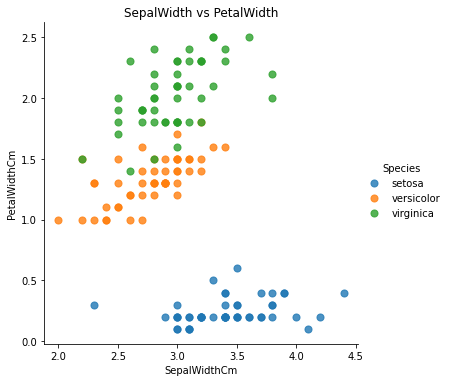

In [36]:
sns.lmplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data=data, fit_reg=False, hue="Species", scatter_kws={"marker": "D", "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data=data, fit_reg=False, hue="Species", scatter_kws={"marker": "D", "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot(x = 'SepalLengthCm', y = 'PetalLengthCm', data=data, fit_reg=False, hue="Species", scatter_kws={"marker": "D", "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot(x = 'SepalWidthCm', y = 'PetalWidthCm', data=data, fit_reg=False, hue="Species", scatter_kws={"marker": "D", "s": 50})
plt.title('SepalWidth vs PetalWidth')

plt.show()

**Coding TV**

In [37]:
print(data["Species"].unique())

['setosa' 'versicolor' 'virginica']


In [38]:
print(data["Species"].value_counts())

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64


In [39]:
data['Species'] = pd.factorize(data['Species'])[0]
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [40]:
data = data.iloc[np.random.permutation(len(data))]
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,10,4.9,3.1,1.5,0.1,0
0,1,5.1,3.5,1.4,0.2,0
6,7,4.6,3.4,1.4,0.3,0
22,23,4.6,3.6,1.0,0.2,0
68,69,6.2,2.2,4.5,1.5,1


**Converting data to numpy array in order for processing**

In [41]:
X = data.iloc[:,1:5].values
y = data.iloc[:,5].values

y

array([0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 1, 2,
       1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0,
       0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0,
       0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0,
       1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 2])

### Normalization

It can be seen from above that the feature of the first dataset has 6cm in Sepal Length, 3.4cm in Sepal Width, 4.5cm in Petal Length and 1.6cm in Petal Width. However, the range of the dataset may be different. Therefore, in order to maintain a good accuracy, the feature of each dataset must be normalized to a range of 0-1 for processing.

Still, the model can be fitted using the not normalised (scaled) data, thus may be useful for large dataset.

In [42]:
X_normalized = normalize(X, axis=0)
print("Examples of X_normalised\n", X_normalized[:3])

Examples of X_normalised
 [[0.06779548 0.082062   0.02951407 0.0057515 ]
 [0.07056264 0.09265065 0.02754646 0.01150299]
 [0.06364474 0.09000348 0.02754646 0.01725449]]


In [43]:
# Creating train,test and validation data (using the not normalised IV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print("Length of train set: ", X_train.shape, "y:", y_train.shape)
print("Length of test set: ", X_test.shape, "y:", y_test.shape)

Length of train set:  (120, 4) y: (120,)
Length of test set:  (30, 4) y: (30,)


### Neural network module

In [44]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

In [45]:
# Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [46]:
def fit_model(optimizer):
  model=Sequential()
  model.add(Dense(200, input_dim=4, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(3, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=20, epochs=100, verbose=0)
    
  print('Accuracy with', optimizer,'optimizer is :', model.evaluate(X_test, y_test)[1]*100)
    
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.legend(loc = 'best')
  plt.title('opt=' + optimizer)

1/1 [==============================] - 0s 12ms/step - loss: 0.1756 - accuracy: 0.9333
Accuracy with sgd optimizer is : 93.33333373069763
1/1 [==============================] - 0s 12ms/step - loss: 0.2021 - accuracy: 0.9333
Accuracy with rmsprop optimizer is : 93.33333373069763
1/1 [==============================] - 0s 13ms/step - loss: 0.5173 - accuracy: 0.9000
Accuracy with adagrad optimizer is : 89.99999761581421
1/1 [==============================] - 0s 11ms/step - loss: 0.2217 - accuracy: 0.9333
Accuracy with adam optimizer is : 93.33333373069763


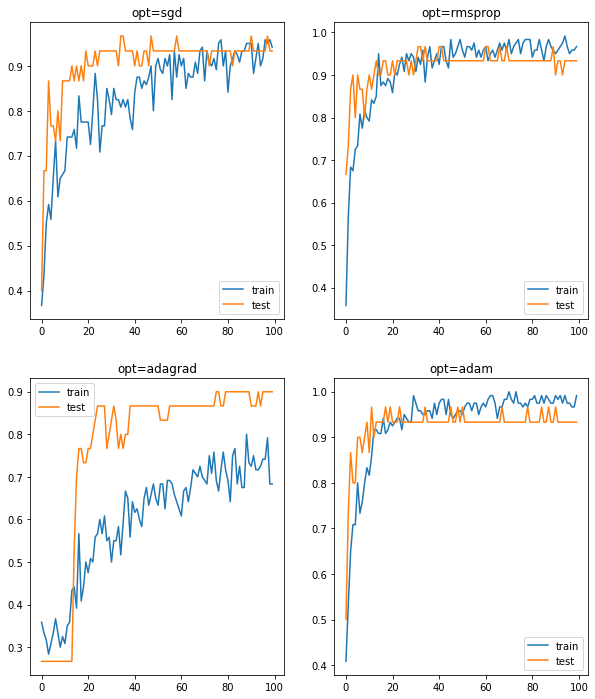

In [47]:
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']
plt.figure(figsize=(10,12))
for i in range(len(optimizers)):
    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for an optimizer
    fit_model(optimizers[i])
# show learning curves
plt.show()